In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
# dataset path
data_dir = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/'

data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 5993 files belonging to 107 classes.


2022-12-13 16:06:01.915485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 16:06:01.916492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 16:06:02.247703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 16:06:02.248732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 16:06:02.249515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
# Create an ImageDataGenerator and do Image Augmentation
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest',
        validation_split = 0.2
)

In [4]:
height = 224
width = 224
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [5]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 4835 images belonging to 107 classes.
Found 1156 images belonging to 107 classes.


In [6]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 107 ....


2022-12-13 16:06:15.064386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


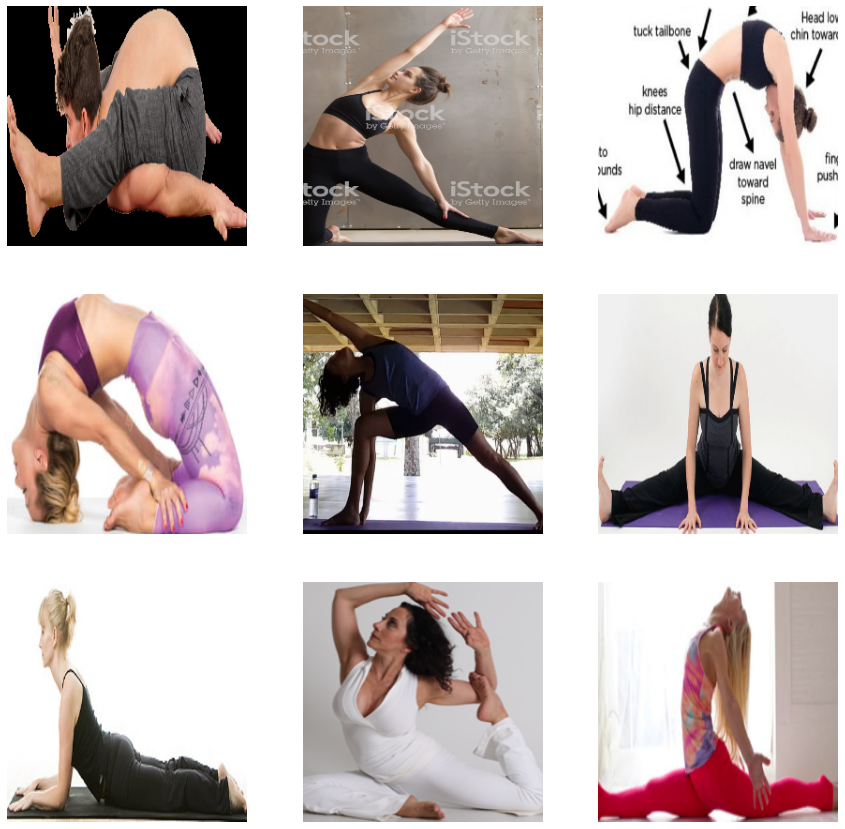

In [7]:
#Defing a function to see images
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

In [8]:
# load pre-trained InceptionV3
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

# The last 15 layers fine tune
for layer in pre_trained.layers[:-15]:
    layer.trainable = False

# The last 15 layers fine tune
for layer in pre_trained.layers[-15:]:
    layer.trainable = True

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 10,
                    verbose = 1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


2022-12-13 16:06:35.516971: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 80/151 [==============>...............] - ETA: 53s - loss: 4.6452 - accuracy: 0.0570

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


151/151 [==============================] - 161s 950ms/step - loss: 4.3355 - accuracy: 0.0904 - val_loss: 3.6094 - val_accuracy: 0.1658
Epoch 2/10
151/151 [==============================] - 105s 699ms/step - loss: 3.2682 - accuracy: 0.2144 - val_loss: 3.0687 - val_accuracy: 0.2405
Epoch 3/10
151/151 [==============================] - 105s 698ms/step - loss: 2.7989 - accuracy: 0.3071 - val_loss: 2.9341 - val_accuracy: 0.2865
Epoch 4/10
151/151 [==============================] - 106s 700ms/step - loss: 2.5212 - accuracy: 0.3492 - val_loss: 2.8038 - val_accuracy: 0.3082
Epoch 5/10
151/151 [==============================] - 106s 704ms/step - loss: 2.2479 - accuracy: 0.4058 - val_loss: 2.6676 - val_accuracy: 0.3411
Epoch 6/10
151/151 [==============================] - 106s 699ms/step - loss: 2.0956 - accuracy: 0.4445 - val_loss: 2.7198 - val_accuracy: 0.3255
Epoch 7/10
151/151 [==============================] - 106s 703ms/step - loss: 1.9808 - accuracy: 0.4664 - val_loss: 2.5178 - val_accura

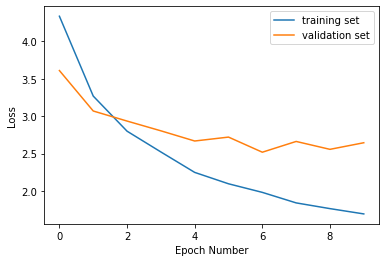

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
plt.legend()

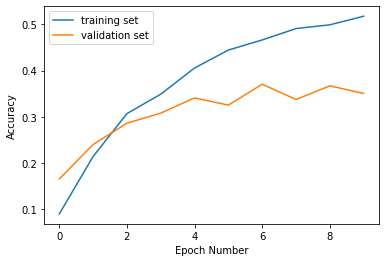

In [12]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='validation set')
plt.legend()

In [20]:
model_name = 'inception.h5'
model.save(model_name, save_format='h5')

In [21]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [22]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

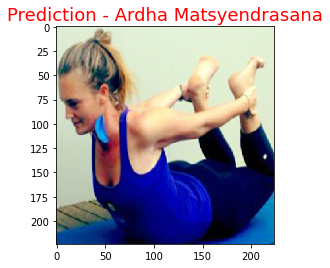

In [23]:
predict_image('/kaggle/input/yoga-pose-image-classification-dataset/dataset/dhanurasana/17-0.png', model)

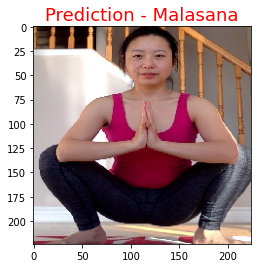

In [24]:
predict_image('/kaggle/input/yoga-pose-image-classification-dataset/dataset/malasana/90-0.png', model)

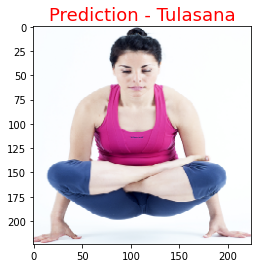

In [25]:
predict_image('/kaggle/input/yoga-pose-image-classification-dataset/dataset/tolasana/62-0.png', model)

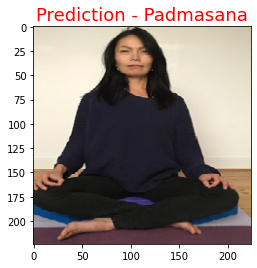

In [26]:
predict_image('/kaggle/input/yoga-pose-image-classification-dataset/dataset/sukhasana/2-0.png', model)